In [1]:
# General important stuff
import control as ct
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from pyphotonicsims.control_systems.control_core import *
from pyphotonicsims.control_systems.calculate_laser_noise import *
from pyphotonicsims.laser_dynamics.semiconductor_laser import *

from scipy.integrate import odeint, RK45, solve_ivp

# plt.style.available
%matplotlib inline
plt.style.use('science')
plt.rcParams['figure.figsize'] = [4,3]

## Laser metrics caculation: cavity Q, I_th, efficiency, ST linewidth

In [2]:
laser = LaserModel('hybrid')

-----------------REPORT------------------
Cavity Q:      2.3e+05
Active loss:   39.7 MHz
Passive loss:  205.7 MHz
Cavity loss:   245.4 MHz
Mirror loss:   589.4 MHz
g_th:          1312.3 cm^(-1)
N_th:          3.30e18 cm^(-3)
I_th:          95.9 mA
eta_d:         70.6 %
eta:           56.5 %
ST linewidth:  1.2e+02 Hz


## PI sweep from 0 mA to 10*I_th, showing thresholding and linewidth narrowing behaviors

c:\users\lkk12\documents\code\pyphotonicssims\pyphotonicsims\laser_dynamics\semiconductor_laser.py:99: RuntimeWarning: invalid value encountered in log
  g = self.g0 / (1 + self.eps * Np) * (np.log(Ne + self.N_s) - np.log(self.N_tr + self.N_s))


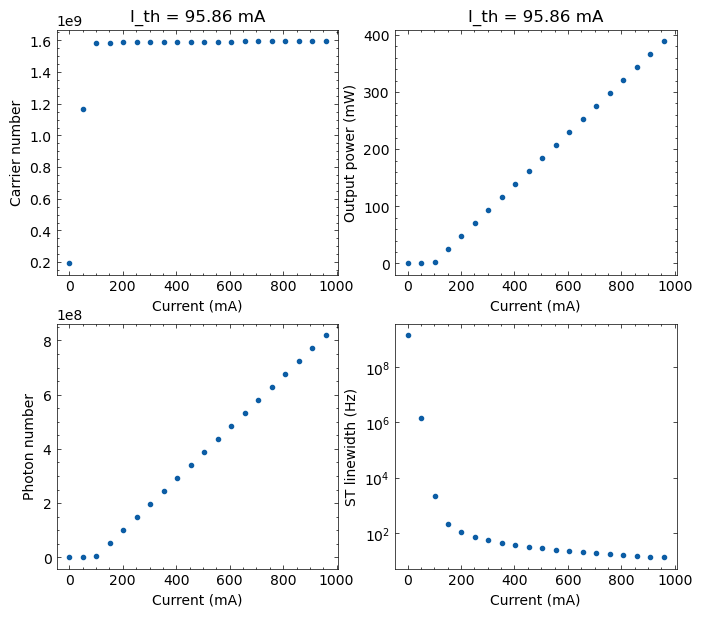

In [3]:
Ix = np.linspace(0,10*laser.I_th,20)
laser.PI_visulization(Ix,plotindensity=False)

## Transient visualization of laser dynamics

c:\users\lkk12\documents\code\pyphotonicssims\pyphotonicsims\laser_dynamics\semiconductor_laser.py:99: RuntimeWarning: invalid value encountered in log
  g = self.g0 / (1 + self.eps * Np) * (np.log(Ne + self.N_s) - np.log(self.N_tr + self.N_s))


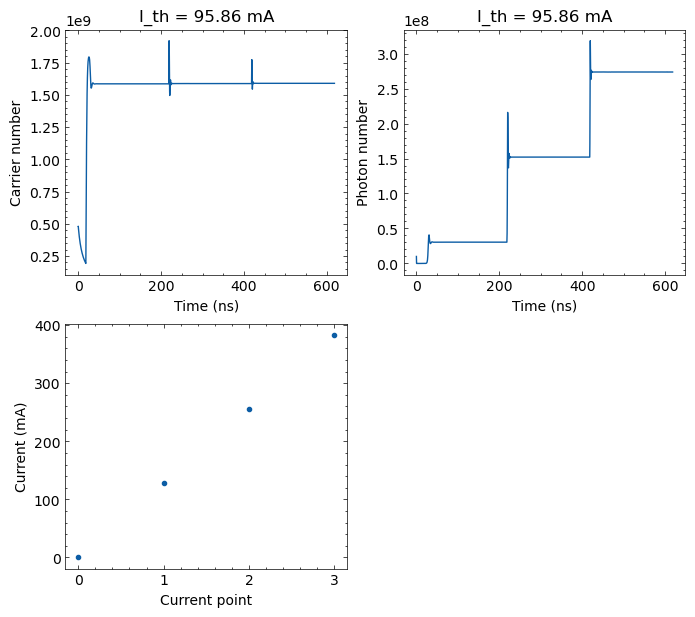

In [4]:
Ix = np.linspace(0,4*laser.I_th,4)
laser.transient_visulization(Ix,plotindensity=False)

## Laser current modulation frequency response, in terms of carrier density, photon density and output power

Text(0, 0.5, 'dP/dI (mW/mA)')

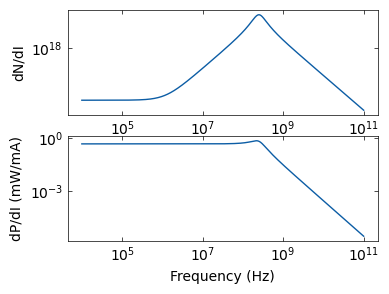

In [5]:
n1,s1,p1,H,freqx = laser.freqresp_current_mod(laser.I_th*2,freq1 = 1e4,freq2 = 1e11)
plt.subplot(211)
plt.loglog(freqx,abs(n1))
plt.xlabel('Frequency (Hz)')
plt.ylabel('dN/dI')
plt.subplot(212)
plt.loglog(freqx,abs(p1))
plt.xlabel('Frequency (Hz)')
plt.ylabel('dP/dI (mW/mA)')

# Laser metrics vs cavity extention

In [6]:
Lpx = np.logspace(-2,2,100)
laser.Lp = 